In [1]:
import pandas as pd
df = pd.read_csv('./data.csv')

In [2]:
df.describe()


,id,likes
count,17331.000000,17331.000000
mean,8666.000000,718.392130
std,5003.173093,3866.475948
min,1.000000,0.000000
25%,4333.500000,3.000000
50%,8666.000000,73.000000
75%,12998.500000,352.000000
max,17331.000000,254931.000000


In [3]:
df.head()

,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


In [4]:
df.shape

(17331, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17331 entries, 0 to 17330
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                17331 non-null  int64 
 1   date              17331 non-null  object
 2   likes             17331 non-null  int64 
 3   content           17331 non-null  object
 4   username          17331 non-null  object
 5   media             17331 non-null  object
 6   inferred company  17331 non-null  object
dtypes: int64(2), object(5)
memory usage: 947.9+ KB


In [6]:
df.isnull().sum()

id                  0
date                0
likes               0
content             0
username            0
media               0
inferred company    0
dtype: int64

In [7]:
df.columns

Index(['id', 'date', 'likes', 'content', 'username', 'media',
       'inferred company'],
      dtype='object')

In [8]:
df.dropna(subset=['content', 'username', 'inferred company', 'likes'], inplace=True)
df['media'].fillna('no_media', inplace=True)
df['has_media'] = df['media'].apply(lambda x: x != 'no_media')
df['content'] = df['content'].astype(str).str.strip().str.lower()
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')


C:\Users\Shreyansh Singh\AppData\Local\Temp\ipykernel_33176\1005543337.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['media'].fillna('no_media', inplace=True)


<Axes: xlabel='likes', ylabel='Count'>

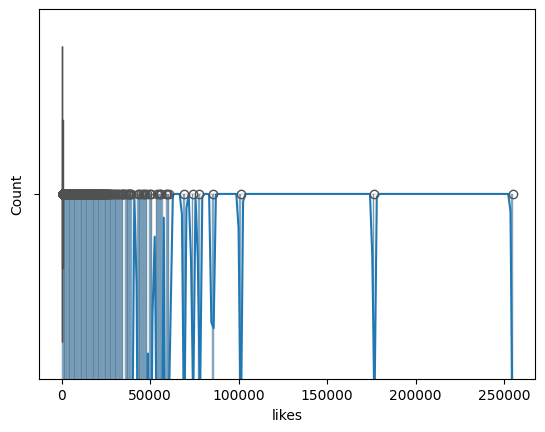

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['likes'], kde=True)
sns.boxplot(x=df['likes'])

In [10]:
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

In [11]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df['char_count'] = df['content'].apply(len)

Features for api: content, username

Content -> word_count, char_count
media -> has_media
datetime -> hour, weekday

In [13]:
from textblob import TextBlob
df['sentiment'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['company_encoded'] = le.fit_transform(df['inferred company'])

In [ ]:
df['has_media'] = df['has_media'].astype(int) #converting to val

0        1
1        1
2        1
3        1
4        1
        ..
17326    1
17327    1
17328    1
17329    1
17330    1
Name: has_media, Length: 17331, dtype: int64

Now we cann train our model with feature : has_media, company_encoded, sentiment, char_count, hour

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X = df[['has_media', 'char_count', 'word_count', 'hour', 'sentiment']]
y = df['likes']   # MUST be a Series

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

preds = model.predict(X_val)
mse = mean_squared_error(y_val, preds)
rmse = np.sqrt(mse)

print("RMSE:", rmse)


RMSE: 3698.493596620794


In [30]:
import joblib
joblib.dump(model, 'like_predictor.pkl')

['like_predictor.pkl']